# HEART DISEASE PREDICTION USING MACHINE LEARNING

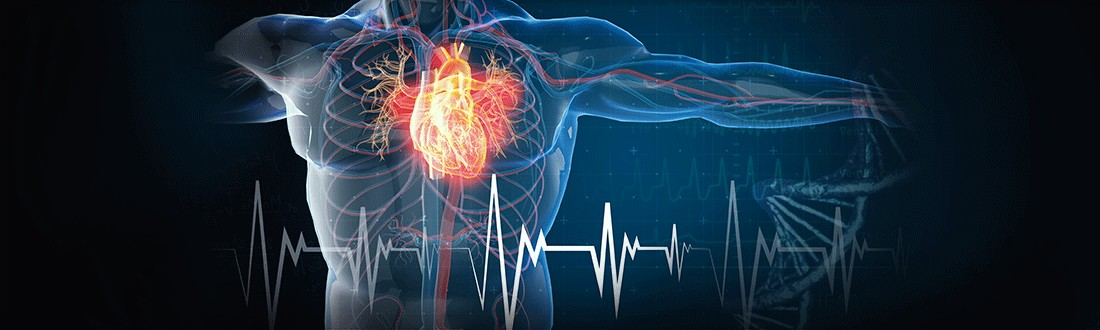

Made by : SYED MOHD ASKARI

## Importing Libraries

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from collections import Counter

## Reading the Data from CSV file

In [2]:
heart = pd.read_csv("heart_disease_data.csv")

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### Features

We use the following 13 features (X) to determine our predictor (Y):

1. Age.
2. Sex: 1 = Male, 0 = Female.
3. (cp) chest pain type (4 values – Ordinal), 1st value: typical angina, 2nd value: atypical angina, 3rd value: non-anginal pain, 4th value: asymptomatic.
4. (trestbps) resting blood pressure.
5. (chol) serum cholesterol.
6. (Fbs) – fasting blood sugar > 120 mg/dl.
7. (restecg) – resting electrocardiography results.
8. (thalach) – maximum heart rate achieved.
9. (exang) – exercise-induced angina.
10. (oldpeak) – ST depression caused by exercise relative to rest.
11. (slope) – the slope of the peak exercise ST segment.
12. (ca) – the number of major vessels colored by fluoroscopy.
13. (thal) – maximum heart rate achieved (Ordinal), 3 = normal, 6 = fixed defect, 7 = reversible defect.

## Data Analysis

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Correlation Matrix

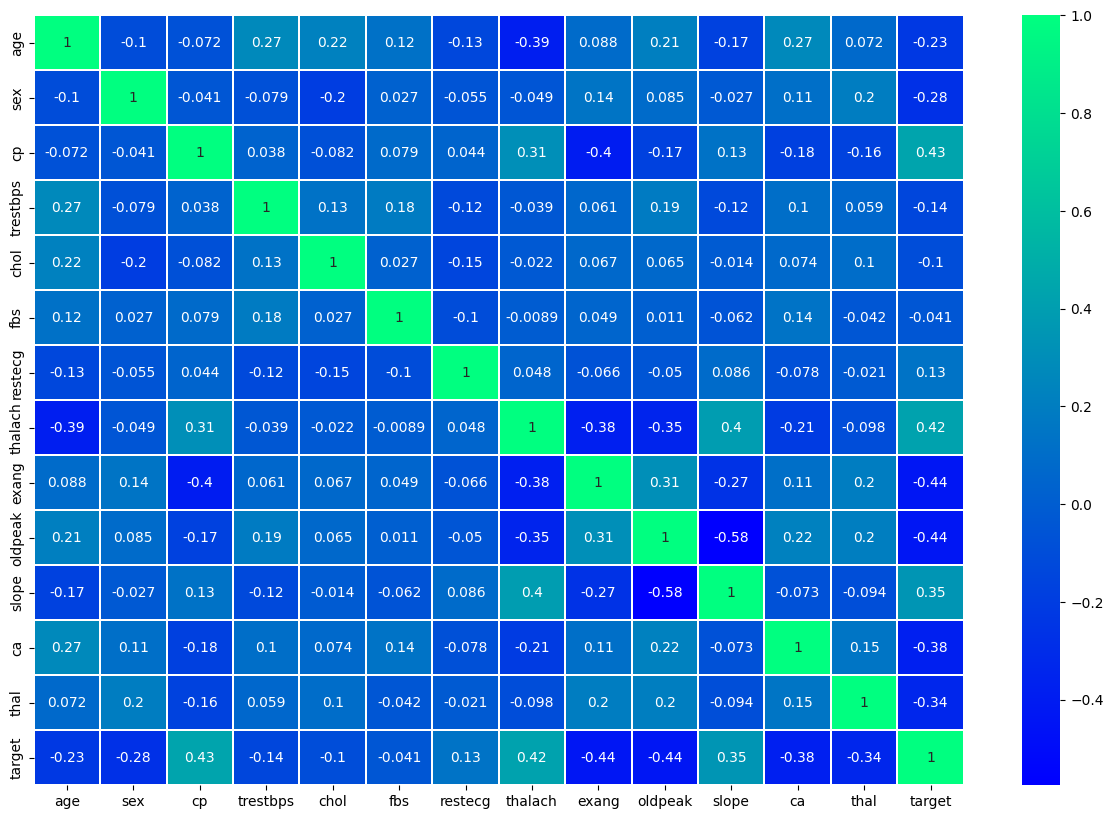

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

#### Inference:

From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.

#### Analysing relation between each features distribution with the help of histogram

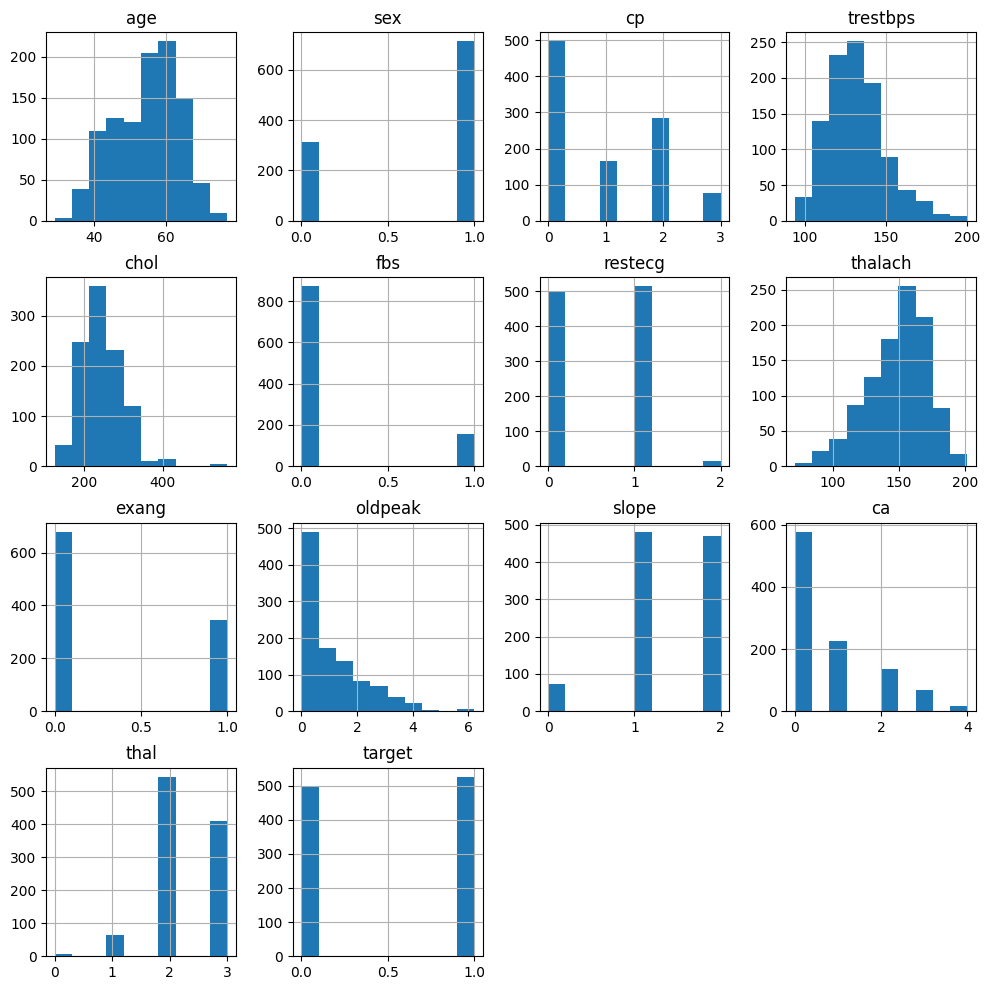

In [8]:
heart.hist(figsize=(12,12))
plt.savefig('featuresplot')

## Train-Test Split

In [9]:
heart['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
X = heart.drop(columns='target', axis=1)
Y = heart['target']

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=2)

We split the whole dataset into trainset and testset which contains 80% train and 20% test.
- random_state parameter is used to set a seed for the random number generator. It ensures that the data split is reproducible. 
- stratify is an optional parameter used for stratified sampling. When stratify is set to Y, it ensures that the class distribution in the training and testing sets is similar to the original dataset.

We can include this train set into classifiers to train our model and the test set is useful for predicting the performance of the model by different classifiers.s.

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


##### Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [13]:
print(Y_test.unique())
Counter(Y_train)

[0 1]


Counter({1: 421, 0: 399})

#### Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Model

#### 1st Model: Logistic Regression

In [15]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.linear_model import LogisticRegression

In [16]:
model1=LogisticRegression(random_state=1)
model1.fit(X_train, Y_train)

LogisticRegression(random_state=1)

In [17]:
prediction1 = model1.predict(X_test)
accuracy1 = accuracy_score(prediction1, Y_test)

In [18]:
print('accuracy : ', accuracy1)
print(classification_report(Y_test, prediction1))

accuracy :  0.8048780487804879
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.77      0.88      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



#### 2nd Model: Support Vector Machine (SVM)

In [19]:
from sklearn.metrics import classification_report ,accuracy_score 
from sklearn.svm import SVC

In [20]:
model2 = SVC(random_state=1) # get instance of model
model2.fit(X_train, Y_train) # Train/Fit model

SVC(random_state=1)

In [21]:
prediction2 = model2.predict(X_test)
accuracy2 = accuracy_score(Y_test, prediction2)

In [22]:
print('accuracy: ', accuracy2)
print(classification_report(Y_test, prediction2))

accuracy:  0.9024390243902439
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.89      0.92      0.91       105

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



#### 3rd Model: Naive Bayes Classifier

In [41]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [42]:
model3 = GaussianNB()
model3.fit(X_train, Y_train)

GaussianNB()

In [43]:
prediction3 = model3.predict(X_test)
accuracy3 = accuracy_score(Y_test,prediction3)

In [44]:
print('accuracy : ', accuracy3)
print(classification_report(Y_test, prediction3))

accuracy :  0.7804878048780488
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.77      0.81      0.79       105

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



#### 4th Model:  K-NN (K-Nearest Neighbours)

In [27]:
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model4 = KNeighborsClassifier() # get instance of model
model4.fit(X_train, Y_train) # Train/Fit model

KNeighborsClassifier()

In [29]:
prediction4 = model4.predict(X_test)
accuracy4 = accuracy_score(prediction4, Y_test)

In [30]:
print('accuracy: ', accuracy4)
print(classification_report(Y_test, prediction4))

accuracy:  0.8585365853658536
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       100
           1       0.90      0.82      0.86       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



#### 5th Model: Random Forest

In [31]:
from sklearn.metrics import classification_report ,accuracy_score 
from sklearn.ensemble import RandomForestClassifier

In [32]:
model5 = RandomForestClassifier(random_state=1)# get instance of model
model5.fit(X_train, Y_train) # Train/Fit model

RandomForestClassifier(random_state=1)

In [33]:
prediction5 = model5.predict(X_test)
accuracy5 = accuracy_score(prediction5, Y_test)

In [34]:
print('accuracy: ', accuracy5)
print(classification_report(Y_test, prediction5))

accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Model Evaluation

In [35]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine','Naive Bayes',
                                   'K-Nearest Neighbour','Random Forest'], 'Accuracy': [
                    accuracy1*100,accuracy2*100,accuracy3*100,accuracy4*100,accuracy5*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,80.487805
1,Support Vector Machine,90.243902
2,Naive Bayes,78.048780
3,K-Nearest Neighbour,85.853659
4,Random Forest,100.000000


# Result : 
After testing different ML algorithms, we found that the best one was Random Forest, as it gave us the optimal accuracy of 100%.

 ## Finding Feature Score

In [36]:
# get importance
importance = model5.feature_importances_

In [37]:
# summarize feature importance
for i,v in enumerate(importance):
   print("Feature: %0d, Score: %.5f" % (i,v))

Feature: 0, Score: 0.08975
Feature: 1, Score: 0.03405
Feature: 2, Score: 0.12565
Feature: 3, Score: 0.07550
Feature: 4, Score: 0.07807
Feature: 5, Score: 0.00882
Feature: 6, Score: 0.01725
Feature: 7, Score: 0.12470
Feature: 8, Score: 0.06372
Feature: 9, Score: 0.09605
Feature: 10, Score: 0.04696
Feature: 11, Score: 0.10531
Feature: 12, Score: 0.13417


In [38]:
# Get feature names
feature_names = heart.columns  # Replace with your actual feature names
# Print feature importance as a table
print("Feature         Score")
for feature_name, importance_score in zip(feature_names, importance):
    print(f"{feature_name.ljust(15)} {importance_score:.5f}")

Feature         Score
age             0.08975
sex             0.03405
cp              0.12565
trestbps        0.07550
chol            0.07807
fbs             0.00882
restecg         0.01725
thalach         0.12470
exang           0.06372
oldpeak         0.09605
slope           0.04696
ca              0.10531
thal            0.13417


#### Result : 

We found that the top four features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca) and ST depression caused by exercise relative to rest (oldpeak). 

## Conclusion

We had 13 features, out of which we found that the most important ones were chest pain type and maximum heart rate achieved. 
We tested out four different ML algorithms and found that the most accurate algorithm was Random Forest.

## Final Checking of Model Implementation
Now, we can apply the best working algorithm (i.e., Random Forest) into our model and check whether our model will result in the correct output or not with the help of available data.

#### CASE 1 – For Heart Disease data

In [39]:
input=(50,0,1,120,244,0,1,162,0,1.1,2,0,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=model5.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


#### CASE 2 – For Normal Data

In [40]:
input=(70,1,0,145,174,0,1,125,1,2.6,0,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre2=model5.predict(input_reshaped)
if(pre2==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)
